## Line Identification Process Summary
Last updated July 9, 2021

### 0. Import some necessary packages
Some come built-in with some installations of Python, but some have been written by Adam (from his repo [`brick_linesurvey`](https://github.com/keflavich/brick_linesurvey) [linked here] on Github). Putting the `makemax.py`, `full_spectrum_plot.py`, and `spectral_ids.py` files somewhere within the directory you run this notebook from should work.

In [2]:
from astroquery.splatalogue import Splatalogue, utils
from astropy import units as u
from astropy import table
from full_spectrum_plot import plot_spectrum, plot_spectrum_line_ids
from spectral_ids import line_ids
import pyspeckit

results = '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/spectra/'

### 1. Generate mean and max spectra
Run `makemax.py` from the command line from the directory with processed data cubes, `/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/`. The spectra will end up in a subfolder, `/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/spectra/`.

### 2. Find all possible lines in a spectrum with Splatalogue

First, we'll pick a spectral window and define the filenames for the max and mean spectrum.

In [27]:
freq_spw = '273_spw51' # '139_spw71'
max_fn = results+'source_ab_'+freq_spw+'_clean_2sigma_n50000_masked_3sigma_pbmask0p18.max.fits'
mean_fn = results+'source_ab_'+freq_spw+'_clean_2sigma_n50000_masked_3sigma_pbmask0p18.mean.fits'

We'll now identify lines in the max spectrum above a threshold set in `line_ids()` within `spectral_ids.py`.

There are multiple beams for this spectrum that are being ignored when creating the HDU.


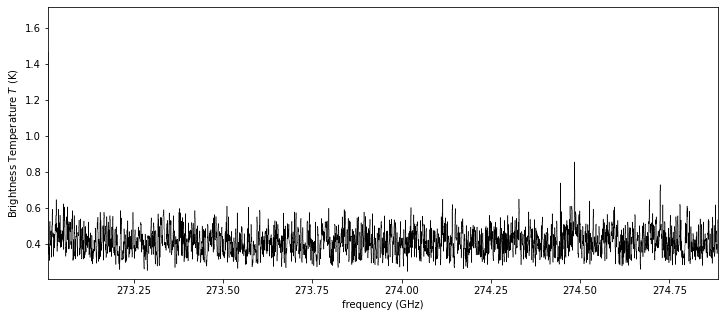

INFO: Left region selection unchanged.  xminpix, xmaxpix: 0,1 [pyspeckit.spectrum.interactive]
INFO: Renormalizing data by factor 1.465541e+00 to improve fitting procedure [pyspeckit.spectrum.fitters]
ERROR: number of parameters must not exceed data
INFO: Left region selection unchanged.  xminpix, xmaxpix: 0,2 [pyspeckit.spectrum.interactive]
ERROR: number of parameters must not exceed data


UnboundLocalError: local variable 'match_table' referenced before assignment

In [28]:
# Plot max spectrum
plot_spectrum(max_fn)
# Identify lines in max spectrum
max_ids = line_ids(max_fn)
# Plot max spectrum with initial line IDs
plot_spectrum_line_ids(max_fn, max_ids) # Needed to pip install lineid_plot

Then, we'll repeat this process for the mean spectrum.

There are multiple beams for this spectrum that are being ignored when creating the HDU.


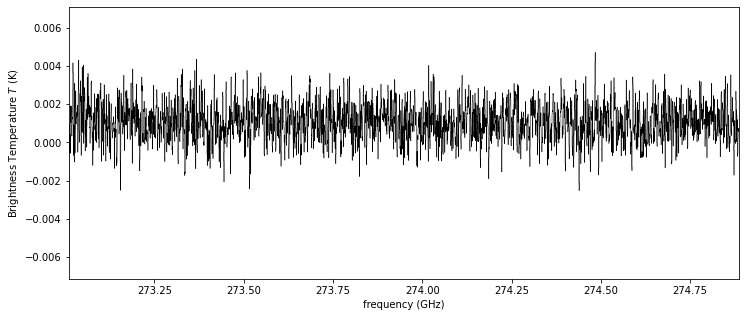

UnboundLocalError: local variable 'match_table' referenced before assignment

In [29]:
# Plot mean spectrum
plot_spectrum(mean_fn)
# Identify lines in mean spectrum
mean_ids = line_ids(mean_fn)
# Plot mean spectrum with initial line IDs
plot_spectrum_line_ids(mean_fn, mean_ids) # Needed to pip install lineid_plot

### 3. Copy these lines into the spreadsheet and cross-check them with line lists
This [line ID spreadsheet](https://docs.google.com/spreadsheets/d/1B4sHLf_wz-8dLeuXcpQO7iRED7mK7Phk61SxGWw5Bok/edit?usp=sharing) is where I'm keeping track of the lines I have found. I'm cross-checking these first with [Jones et al. 2012](https://ui.adsabs.harvard.edu/abs/2012MNRAS.419.2961J/abstract) (shorter lists, tables) and then with [Belloche et al. 2013](https://ui.adsabs.harvard.edu/abs/2013A%26A...559A..47B/abstract) (plots). I keep notes on which lines have been found in Sgr B2 by both these groups, and Adam has been looking over them to see which IDs seem likely to him.

### 4. Plot curated line list
Once I have a curated list of lines, I export them to a `.csv` file from the spreadsheet and plot them on a final plot. Here is the most up-to-date [visualizations of the max and mean spectra](https://drive.google.com/file/d/1Q2cD0--tgLTO8V-mipggY7T_PSPFK4FR/view?usp=sharing) (with identified lines labeled).

In [17]:
from astropy.io import ascii
from full_spectrum_plot import plot_spectrum_line_ids_final
# Begin by reading in the .csv file we made
every_line = ascii.read('ACES_lines_brick_updated_20210512.csv', format='csv')
# Remove rows that are masked
# every_line = every_line[~every_line['freq_spw'].mask]
# Group by spectral window and type of spectrum
every_line_by_spectrum = every_line.group_by(['freq_spw','Spectrum type'])

In [18]:
max_ids_87_spw25_L = every_line_by_spectrum.groups[2]
mean_ids_87_spw25_L = every_line_by_spectrum.groups[3]
# max_ids_102_spw106_L = every_line_by_spectrum.groups[0]
# mean_ids_102_spw106_L = every_line_by_spectrum.groups[1]

There are multiple beams for this spectrum that are being ignored when creating the HDU.
support for accessing str attributes such as 'lower' from PhysicalType instances is deprecated since 4.3 and will be removed in a subsequent release.
support for accessing str attributes such as 'title' from PhysicalType instances is deprecated since 4.3 and will be removed in a subsequent release.


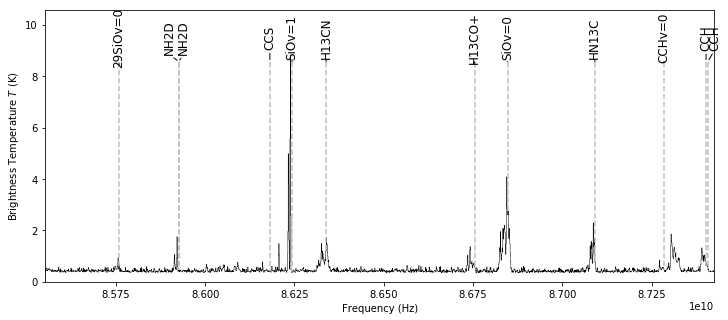

There are multiple beams for this spectrum that are being ignored when creating the HDU.
support for accessing str attributes such as 'lower' from PhysicalType instances is deprecated since 4.3 and will be removed in a subsequent release.
support for accessing str attributes such as 'title' from PhysicalType instances is deprecated since 4.3 and will be removed in a subsequent release.


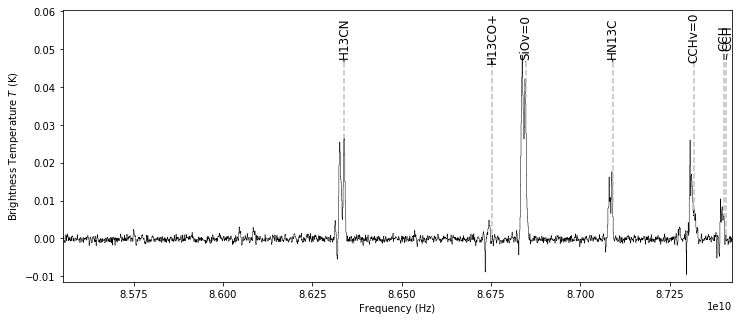

In [19]:
# Plot lines in max spectrum
plot_spectrum_line_ids_final(max_fn, max_ids_87_spw25_L, save=True)
# Plot lines in mean spectrum
plot_spectrum_line_ids_final(mean_fn, mean_ids_87_spw25_L, save=True)